In [74]:
from datetime import datetime as dt

import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import cm

import numpy as np
COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f',  "#900c3f",  "#7d8f69", "#b3bfd1",]

base_path = '/Users/noamazmon/PycharmProjects/network_modularity'

In [2]:
results_csvs = [
'smart_pick_first_analysis_with_connectivity.csv',
'2023-02-19-09-38-12_first_analysis.csv',
]


In [13]:
all_res = pd.DataFrame()
for res_path in results_csvs:
    all_res = pd.concat([pd.read_csv(f"{base_path}/{res_path}"), all_res], ignore_index=True)
all_res.to_csv('2023-02-19_all_first_analysis_results.csv')

In [14]:
fully_connected_num_connection = 72
all_res['connectivity'] = all_res['num_connections']/fully_connected_num_connection


In [5]:
all_res.shape

(41049, 18)

Text(0.5, 1.0, 'Mean performance of an architecture and its connectivity')

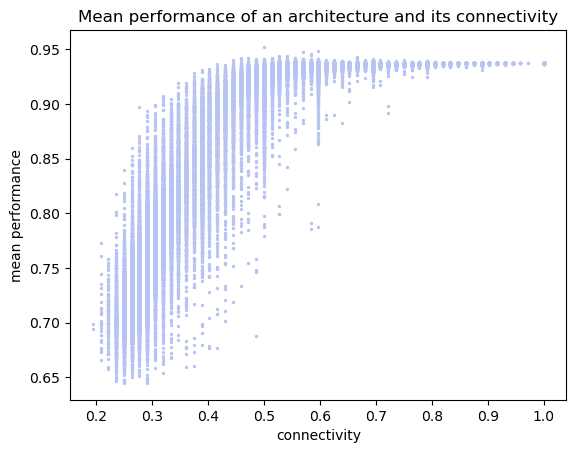

In [6]:
plt.figure()
plt.scatter(all_res['connectivity'], all_res['mean_performance'], c=COLORS[1],
           s=2)
plt.ylabel('mean performance')
plt.xlabel('connectivity')
plt.title('Mean performance of an architecture and its connectivity')

Text(0.5, 1.0, 'Mean performance of an architecture and its connectivity')

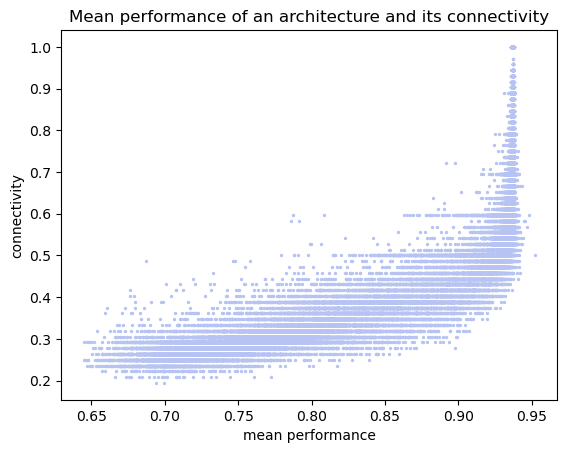

In [55]:
plt.figure()
plt.scatter( all_res['mean_performance'], all_res['connectivity'], c=COLORS[1],
           s=2)
plt.xlabel('mean performance')
plt.ylabel('connectivity')
plt.title('Mean performance of an architecture and its connectivity')

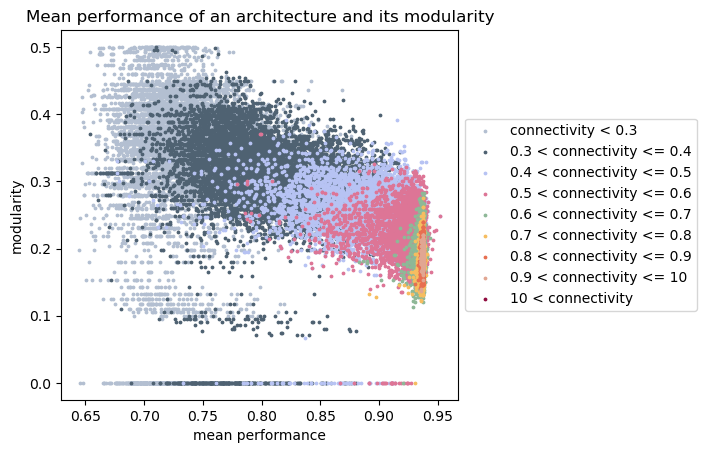

In [44]:
plt.figure()
ax = plt.subplot(111)
COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#e1a692',  "#900c3f",  "#7d8f69", "#b3bfd1",]

connectivities = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,10]
ax.scatter(all_res['mean_performance'][all_res['connectivity'] <= connectivities[0]], all_res['modularity'][all_res['connectivity'] < connectivities[0]], c=COLORS[-1],
           s=3,  label=f'connectivity < {connectivities[0]}')
for i in range(len(connectivities)-1):
    ax.scatter(all_res['mean_performance'][all_res['connectivity'].between(connectivities[i], connectivities[i+1])], all_res['modularity'][all_res['connectivity'].between(connectivities[i], connectivities[i+1])], c=COLORS[i],
           s=3,  label=f'{connectivities[i]} < connectivity <= {connectivities[i+1]}')
ax.scatter(all_res['mean_performance'][all_res['connectivity'] > connectivities[i+1]], all_res['modularity'][all_res['connectivity'] > connectivities[i+1]], c=COLORS[i+1],
           s=3,  label=f'{connectivities[i+1]} < connectivity')

plt.xlabel('mean performance')
plt.ylabel('modularity')
plt.title('Mean performance of an architecture and its modularity')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


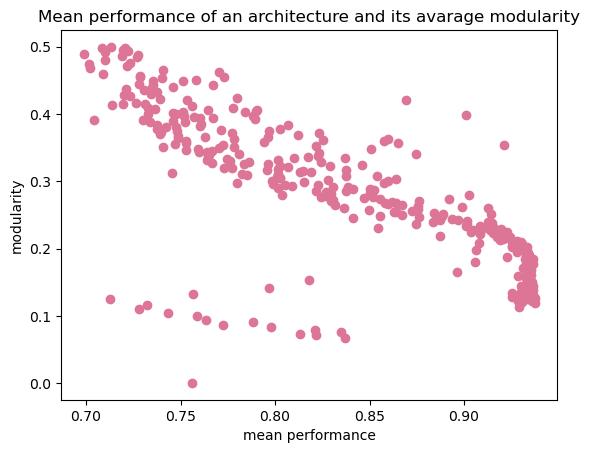

In [54]:
vals = np.linspace(all_res['modularity'].min(), all_res['modularity'].max(), 500)
bins = vals.tolist()
labels = [(vals[i] + vals[i + 1]) / 2 for i in range(len(vals) - 1)]
all_res['modularity_2'] = pd.cut(x=all_res['modularity'], bins=bins, labels=labels, include_lowest=True)
r2 = all_res.groupby(['modularity_2'], as_index=False).agg(
    {'mean_performance': ['mean']}).dropna()
plt.scatter( r2['mean_performance'], r2['modularity_2'], c=COLORS[2])
plt.xlabel('mean performance')
plt.ylabel('modularity')
plt.title('Mean performance of an architecture and its avarage modularity')
plt.show()

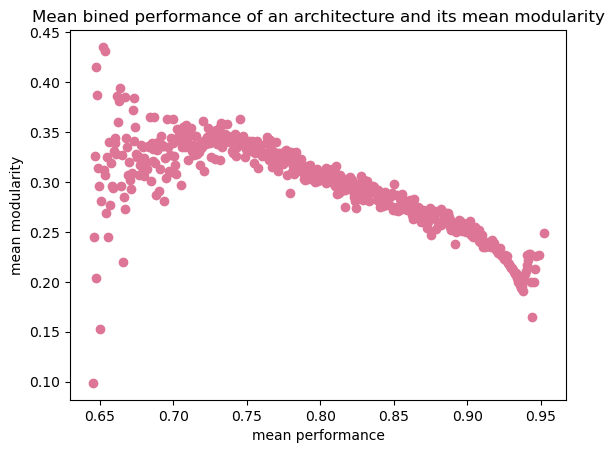

In [68]:
vals = np.linspace(all_res['mean_performance'].min(), all_res['mean_performance'].max(), 500)
bins = vals.tolist()
labels = [(vals[i] + vals[i + 1]) / 2 for i in range(len(vals) - 1)]
all_res['mean_performance_2'] = pd.cut(x=all_res['mean_performance'], bins=bins, labels=labels, include_lowest=True)
r2 = all_res.groupby(['mean_performance_2'], as_index=False).agg(
    {'modularity': ['mean']}).dropna()
plt.scatter( r2['mean_performance_2'], r2['modularity'], c=COLORS[2])
plt.xlabel('mean performance')
plt.ylabel('mean modularity')
plt.title('Mean bined performance of an architecture and its mean modularity')
plt.show()

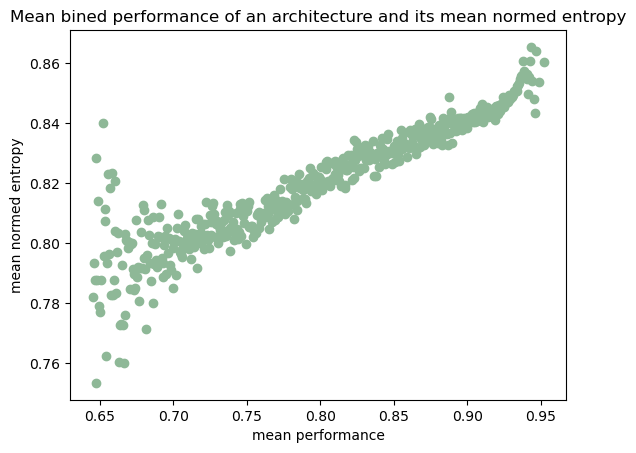

In [71]:
vals = np.linspace(all_res['mean_performance'].min(), all_res['mean_performance'].max(), 500)
bins = vals.tolist()
labels = [(vals[i] + vals[i + 1]) / 2 for i in range(len(vals) - 1)]
all_res['mean_performance_2'] = pd.cut(x=all_res['mean_performance'], bins=bins, labels=labels, include_lowest=True)
r2 = all_res.groupby(['mean_performance_2'], as_index=False).agg(
    {'normed_entropy': ['mean']}).dropna()
plt.scatter( r2['mean_performance_2'], r2['normed_entropy'], c=COLORS[3])
plt.xlabel('mean performance')
plt.ylabel('mean normed entropy')
plt.title('Mean bined performance of an architecture and its mean normed entropy')
plt.show()

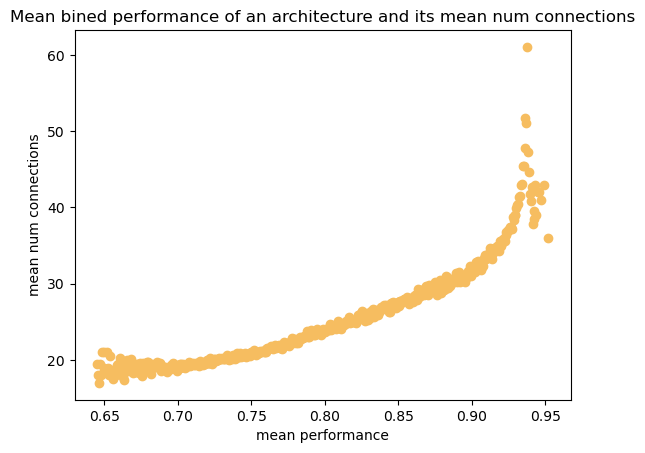

In [72]:
vals = np.linspace(all_res['mean_performance'].min(), all_res['mean_performance'].max(), 500)
bins = vals.tolist()
labels = [(vals[i] + vals[i + 1]) / 2 for i in range(len(vals) - 1)]
all_res['mean_performance_2'] = pd.cut(x=all_res['mean_performance'], bins=bins, labels=labels, include_lowest=True)
r2 = all_res.groupby(['mean_performance_2'], as_index=False).agg(
    {'num_connections': ['mean']}).dropna()
plt.scatter( r2['mean_performance_2'], r2['num_connections'], c=COLORS[4])
plt.xlabel('mean performance')
plt.ylabel('mean num connections')
plt.title('Mean bined performance of an architecture and its mean num connections')
plt.show()

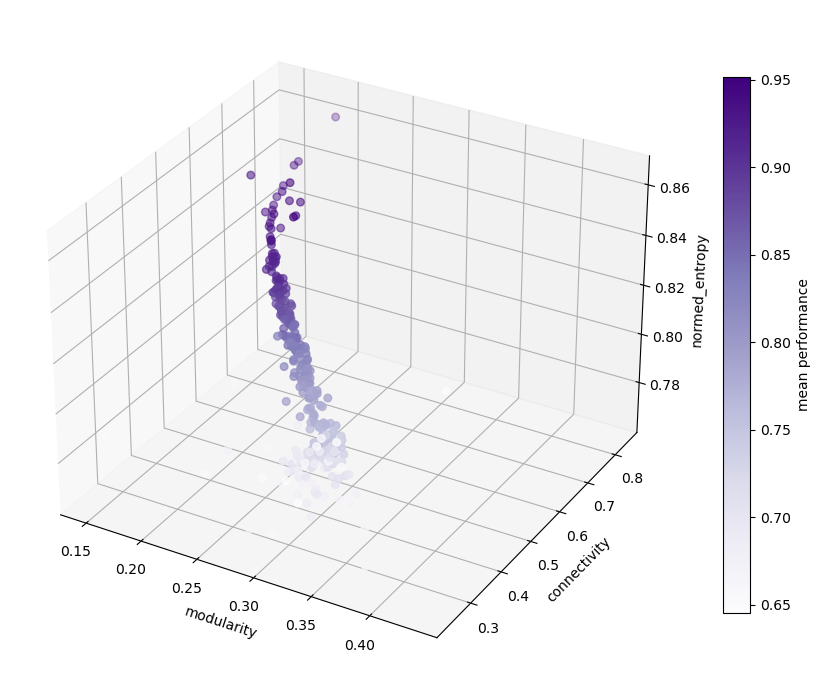

In [140]:
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
vals = np.linspace(all_res['mean_performance'].min(), all_res['mean_performance'].max(), 300)
bins = vals.tolist()
labels = [(vals[i] + vals[i + 1]) / 2 for i in range(len(vals) - 1)]
all_res['mean_performance_2'] = pd.cut(x=all_res['mean_performance'], bins=bins, labels=labels, include_lowest=True)
r2 = all_res.groupby(['mean_performance_2'], as_index=False).agg(
    {'normed_entropy': ['mean'], 'modularity': ['mean'], 'connectivity': ['mean']}).dropna()
x, y, z = [ 'normed_entropy','modularity', 'connectivity',]
x, y, z = ['connectivity', 'normed_entropy','modularity',]
x, y, z = ['connectivity','modularity', 'normed_entropy',]
x, y, z = ['modularity', 'normed_entropy', 'connectivity']
x, y, z = [ 'normed_entropy', 'num_connections','modularity',] #
x, y, z = [ 'normed_entropy', 'modularity', 'num_connections'] #

x, y, z = [  'modularity', 'connectivity', 'normed_entropy'] #


p3d = ax.scatter(r2[x], r2[y], r2[z], s=30, c=np.linspace( r2['mean_performance_2'].min(), r2['mean_performance_2'].max(), num=r2['mean_performance_2'].shape[0]),
                 cmap='Purples')
fig.colorbar(p3d, pad=0.05, shrink=0.8, location='right', label='mean performance')

ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
ax.set_title('')
plt.tight_layout()
plt.show()


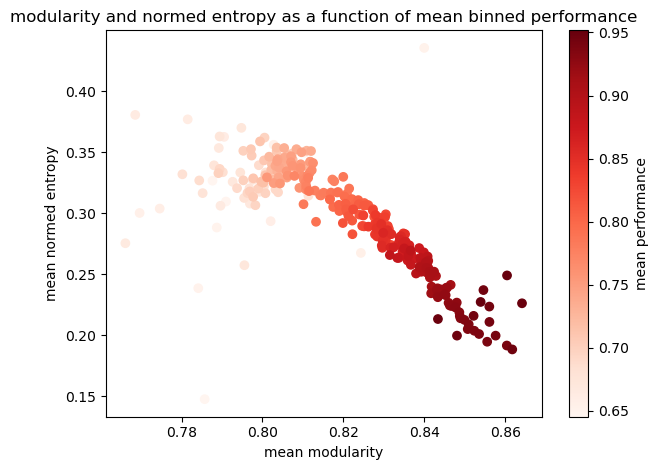

In [118]:
vals = np.linspace(all_res['mean_performance'].min(), all_res['mean_performance'].max(), 300)
bins = vals.tolist()
labels = [(vals[i] + vals[i + 1]) / 2 for i in range(len(vals) - 1)]
all_res['mean_performance_2'] = pd.cut(x=all_res['mean_performance'], bins=bins, labels=labels, include_lowest=True)
r2 = all_res.groupby(['mean_performance_2'], as_index=False).agg(
    {'normed_entropy': ['mean'], 'modularity': ['mean'],}).dropna()
fig = plt.figure()
ax = fig.add_subplot(111, )
p3d = ax.scatter(r2['normed_entropy'], r2['modularity'],
c=np.linspace( r2['mean_performance_2'].min(), r2['mean_performance_2'].max(), num=r2['mean_performance_2'].shape[0]),
                 cmap='Reds')
labels = sorted({f'{x:.1f}' for x in r2['mean_performance_2']})
handles, _ = p3d.legend_elements(prop="sizes", num=len(labels) + 1, alpha=0.6)
ax.set_xlabel('mean modularity')
ax.set_ylabel('mean normed entropy')
ax.set_title('modularity and normed entropy as a function of mean binned performance')
fig.colorbar(p3d, pad=0.05, location='right', label='mean performance')
plt.tight_layout()
plt.show()

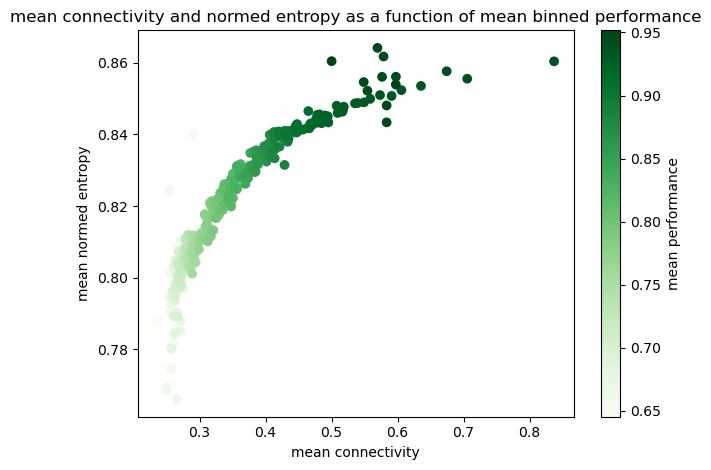

In [122]:
vals = np.linspace(all_res['mean_performance'].min(), all_res['mean_performance'].max(), 300)
bins = vals.tolist()
labels = [(vals[i] + vals[i + 1]) / 2 for i in range(len(vals) - 1)]
all_res['mean_performance_2'] = pd.cut(x=all_res['mean_performance'], bins=bins, labels=labels, include_lowest=True)
r2 = all_res.groupby(['mean_performance_2'], as_index=False).agg(
    {'connectivity': ['mean'], 'normed_entropy': ['mean'],}).dropna()
fig = plt.figure()
ax = fig.add_subplot(111, )
p3d = ax.scatter(r2['connectivity'], r2['normed_entropy'],
c=np.linspace( r2['mean_performance_2'].min(), r2['mean_performance_2'].max(), num=r2['mean_performance_2'].shape[0]),
                 cmap='Greens')
labels = sorted({f'{x:.1f}' for x in r2['mean_performance_2']})
handles, _ = p3d.legend_elements(prop="sizes", num=len(labels) + 1, alpha=0.6)
ax.set_xlabel('mean connectivity')
ax.set_ylabel('mean normed entropy')
ax.set_title('mean connectivity and normed entropy as a function of mean binned performance')
fig.colorbar(p3d, pad=0.05, location='right', label='mean performance')
plt.tight_layout()
plt.show()

In [101]:
np.linspace( r2['mean_performance_2'].min(), r2['mean_performance_2'].max(), num=490)

array([0.6451943 , 0.6458215 , 0.64644871, 0.64707592, 0.64770312,
       0.64833033, 0.64895753, 0.64958474, 0.65021195, 0.65083915,
       0.65146636, 0.65209356, 0.65272077, 0.65334797, 0.65397518,
       0.65460239, 0.65522959, 0.6558568 , 0.656484  , 0.65711121,
       0.65773842, 0.65836562, 0.65899283, 0.65962003, 0.66024724,
       0.66087444, 0.66150165, 0.66212886, 0.66275606, 0.66338327,
       0.66401047, 0.66463768, 0.66526489, 0.66589209, 0.6665193 ,
       0.6671465 , 0.66777371, 0.66840091, 0.66902812, 0.66965533,
       0.67028253, 0.67090974, 0.67153694, 0.67216415, 0.67279136,
       0.67341856, 0.67404577, 0.67467297, 0.67530018, 0.67592738,
       0.67655459, 0.6771818 , 0.677809  , 0.67843621, 0.67906341,
       0.67969062, 0.68031783, 0.68094503, 0.68157224, 0.68219944,
       0.68282665, 0.68345385, 0.68408106, 0.68470827, 0.68533547,
       0.68596268, 0.68658988, 0.68721709, 0.6878443 , 0.6884715 ,
       0.68909871, 0.68972591, 0.69035312, 0.69098032, 0.69160

In [15]:
bad_res.rename(columns={"connectivity_ratio": "connectivity", })

,Unnamed: 0,exp_name,modularity,num_connections,median_performance,mean_performance,connectivity,sum_weight,entropy,normed_entropy,num_successes_0.9,success_percent_0.9,num_successes_0.97,success_percent_0.97,num_successes_1.0,success_percent_1.0,connectivity
0,0,2023-02-09-11-43_1618,0.216837,28,0.5625,0.5625,0.4,29.0,2.526933,0.843511,0.0,0.0,0.0,0.0,0.0,0.0,0.388889
1,1,2023-02-09-12-15_6886,0.487535,19,0.5625,0.5625,0.1,23.0,2.579625,0.876101,0.0,0.0,0.0,0.0,0.0,0.0,0.263889
2,2,2023-02-09-11-55_3260,0.303571,28,0.5625,0.5625,0.4,27.0,2.512325,0.838635,0.0,0.0,0.0,0.0,0.0,0.0,0.388889
3,3,2023-02-09-12-13_6333,0.199074,36,0.5625,0.5625,0.5,37.0,2.528511,0.844038,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
4,4,2023-02-09-12-13_6205,0.443213,19,0.5625,0.5625,0.2,19.0,2.579625,0.876101,0.0,0.0,0.0,0.0,0.0,0.0,0.263889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8766,8766,2023-02-09-12-19_5499,0.326531,21,0.5625,0.5625,0.3,18.0,2.491494,0.831681,0.0,0.0,0.0,0.0,0.0,0.0,0.291667
8767,8767,2023-02-09-11-33_255,0.306122,28,0.5625,0.5625,0.4,23.0,2.496110,0.833222,0.0,0.0,0.0,0.0,0.0,0.0,0.388889
8768,8768,2023-02-09-11-48_1548,0.194336,64,0.5625,0.5625,0.9,46.0,2.597275,0.866992,0.0,0.0,0.0,0.0,0.0,0.0,0.888889
8769,8769,2023-02-09-11-33_947,0.493827,18,0.5625,0.5625,0.2,19.0,2.524168,0.873302,0.0,0.0,0.0,0.0,0.0,0.0,0.250000


In [21]:
for c in ['modularity', 'num_connections',
       'median_performance', 'mean_performance', 'connectivity', 'sum_weight',
       'entropy', 'normed_entropy']:
    print(f"mean {c}: all_res: {all_res[c].mean():.3f},  bad_res: {bad_res[c].mean():.3f}, ")

mean modularity: all_res: 0.275,  bad_res: 0.271, 
mean num_connections: all_res: 31.381,  bad_res: 40.969, 
mean median_performance: all_res: 0.857,  bad_res: 0.562, 
mean mean_performance: all_res: 0.835,  bad_res: 0.562, 
mean connectivity: all_res: 0.436,  bad_res: 0.569, 
mean sum_weight: all_res: 25.023,  bad_res: 29.859, 
mean entropy: all_res: 2.448,  bad_res: 2.553, 
mean normed_entropy: all_res: 0.828,  bad_res: 0.855, 


In [18]:
print(all_res.columns)

Index(['Unnamed: 0', 'exp_name', 'modularity', 'num_connections',
       'median_performance', 'mean_performance', 'connectivity', 'sum_weight',
       'entropy', 'normed_entropy', 'num_successes_1.0', 'success_percent_1.0',
       'num_successes_0.9', 'success_percent_0.9', 'num_successes_0.97',
       'success_percent_0.97'],
      dtype='object')
